## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data =pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isna().sum() # пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [6]:
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [7]:
NumericData = data._get_numeric_data().columns.tolist()
print('Количественные данные:', NumericData)

Количественные данные: ['duration', 'amount', 'age']


In [8]:
OrdinalData = ["status", 'savings', 'employment_duration','installment_rate', 'present_residence', 'number_credits']
print("Порядковые данные:", OrdinalData)

Порядковые данные: ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits']


In [9]:
BinaryData = [column for column in data.columns if len(data[column].unique()) <=2]
print('Бинарные данные:', BinaryData)

Бинарные данные: ['people_liable', 'telephone', 'foreign_worker', 'credit_risk']


In [10]:
CategoricalData = set(data.columns) - set(BinaryData) - set(OrdinalData) - set(NumericData)
CategoricalData = list(CategoricalData)
print("Категориальные данные:", CategoricalData)

Категориальные данные: ['purpose', 'housing', 'other_installment_plans', 'job', 'credit_history', 'personal_status_sex', 'property', 'other_debtors']


In [11]:
assert len(data.columns) == len(NumericData) + len(OrdinalData) + len(BinaryData) + len(CategoricalData)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [12]:
data.groupby(by=["purpose"])["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [13]:
percent_1 = (data.loc[data.age < 30].housing == "rent").mean() * 100
print(round(percent_1, 2), "%", " ", "клиентов моложе 30 лет снимает жилье", sep='')

66.67% клиентов моложе 30 лет снимает жилье


In [14]:
percent_2 = (data.loc[data.age > 40].housing == "rent").mean() * 100
print(round(percent_2, 2), "%", " ", "клиентов старше 40 лет снимает жилье", sep='')

68.01% клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [15]:
print('Количество иностранцев, у которых число кредитов больше 3:', (data.loc[(data.number_credits == '4-5') | (data.number_credits == '>= 6') ].foreign_worker=="yes").sum())

Количество иностранцев, у которых число кредитов больше 3: 1


### Задание 6 (1 балл)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

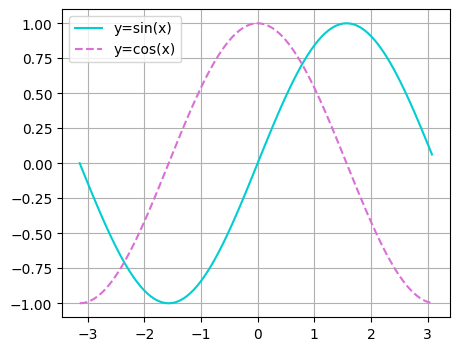

In [17]:
x = np.arange(-np.pi, np.pi, 2*np.pi/100)
plt.figure(figsize = (5,4))
plt.plot(x, np.sin(x), c = "darkturquoise");
plt.plot(x, np.cos(x), "--", c = "orchid");
plt.grid(True)
plt.legend(("y=sin(x)", "y=cos(x)"))
plt.show()

### Задание 7 (1 балл)

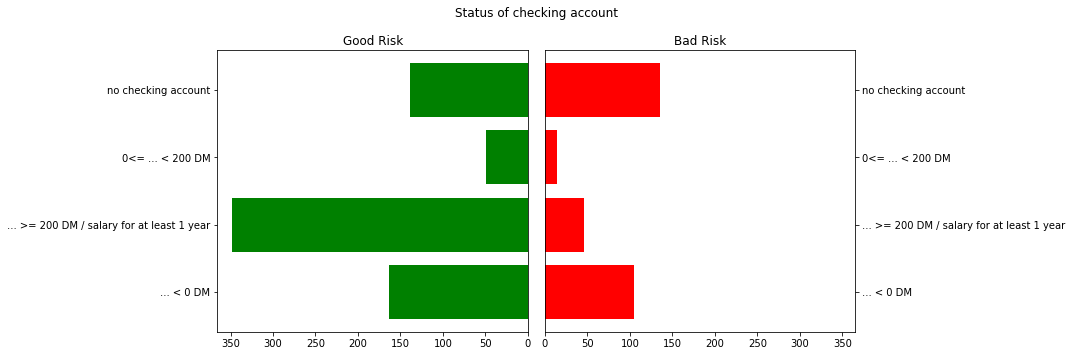

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [18]:
correct_order = sorted(data.status.unique())
good_risk_data = data[data.credit_risk == 'good'].status.value_counts().reindex(correct_order)
bad_risk_data = data[data.credit_risk == 'bad'].status.value_counts().reindex(correct_order)
bad_risk_data

... < 0 DM                                    105
... >= 200 DM / salary for at least 1 year     46
0<= ... < 200 DM                               14
no checking account                           135
Name: status, dtype: int64

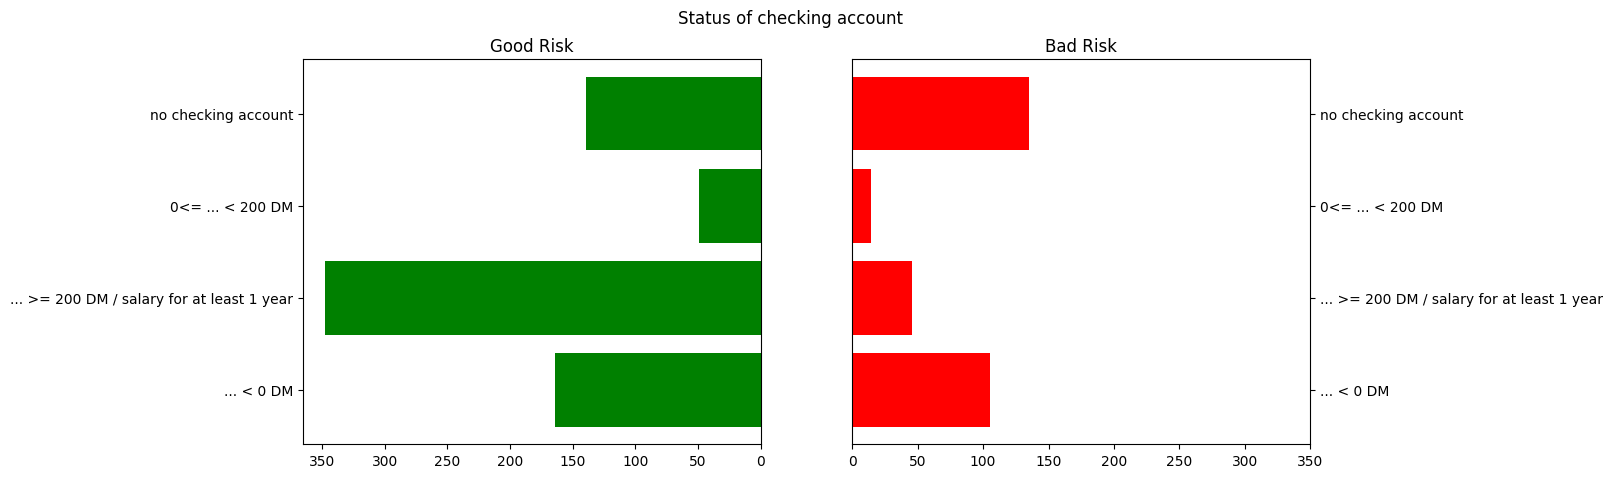

In [19]:
fig, ax = plt.subplots(1,2,figsize=(13,5))
fig.suptitle("Status of checking account");

ax[0].set_title('Good Risk')
ax[0].barh(good_risk_data.keys(), good_risk_data.values, color = "g")
ax[0].invert_xaxis()


ax[1].set_title('Bad Risk')
ax[1].barh(bad_risk_data.keys(), bad_risk_data.values, color = "r")
ax[1].yaxis.tick_right()
ax[1].set_xlim(0,350);


### Задание 8  (0.5 балла)

In [20]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

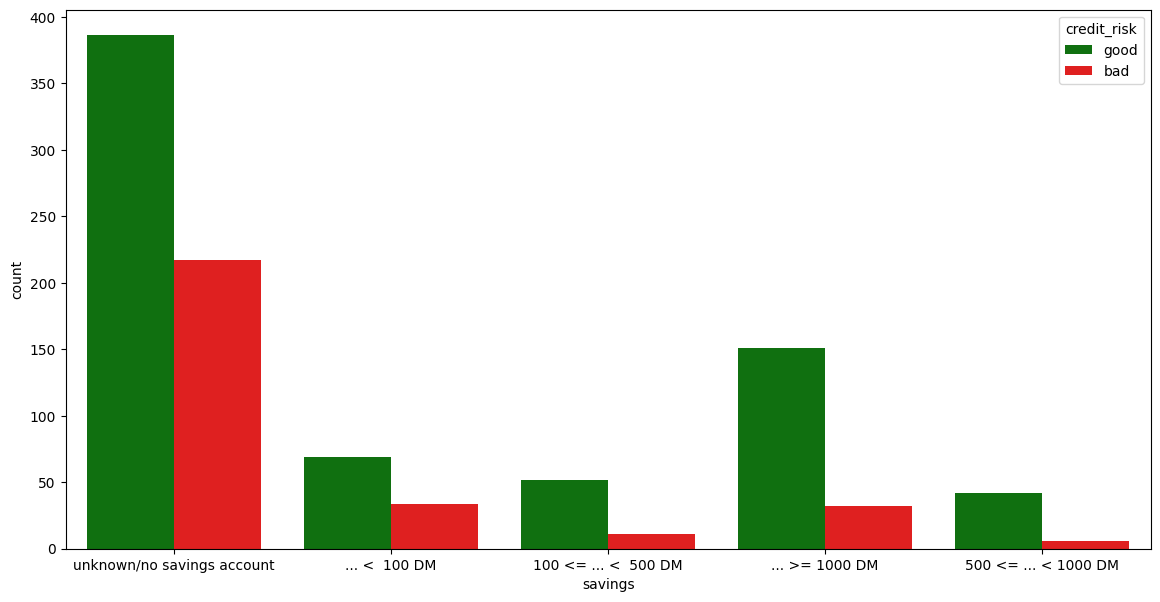

In [21]:
plt.figure(figsize = (14,7))
sns.countplot(x = "savings",
              data = data,
              hue = "credit_risk",
              palette = ["green", "red"]);

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

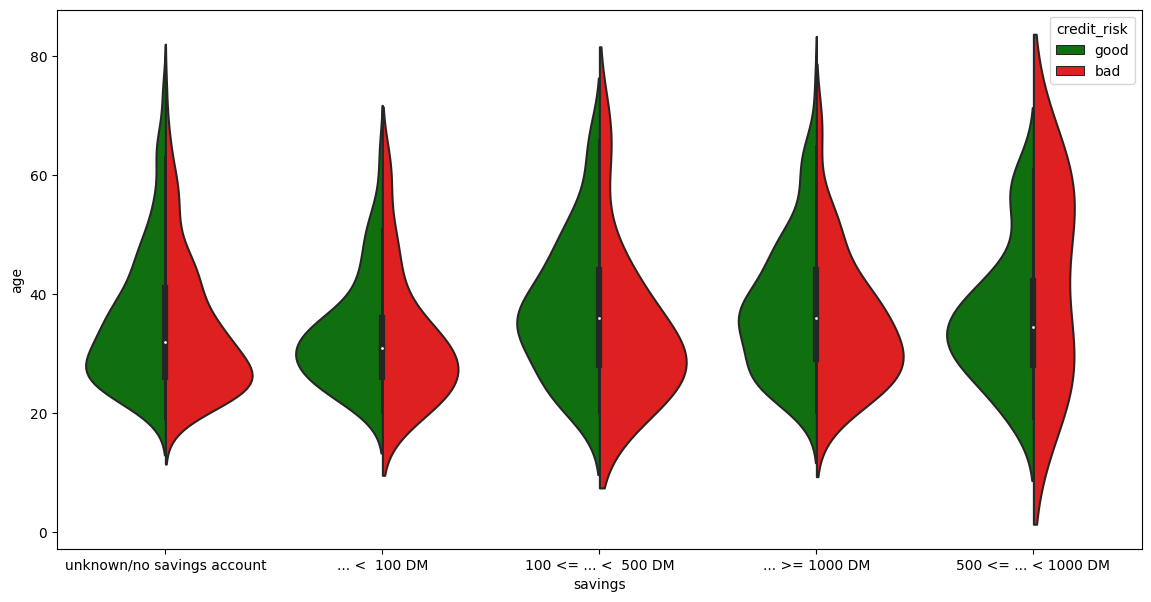

In [22]:
plt.figure(figsize = (14,7))
sns.violinplot(data=data,
               x = "savings",
               y = "age",
               hue = "credit_risk",
               palette = ["green", "red"],
               split = True);

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [23]:
# your code here

<ipython-input-24-4d1114122d04>:19: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax[0], ax[1], ax[2]], labels = ['Good credits age distribution',


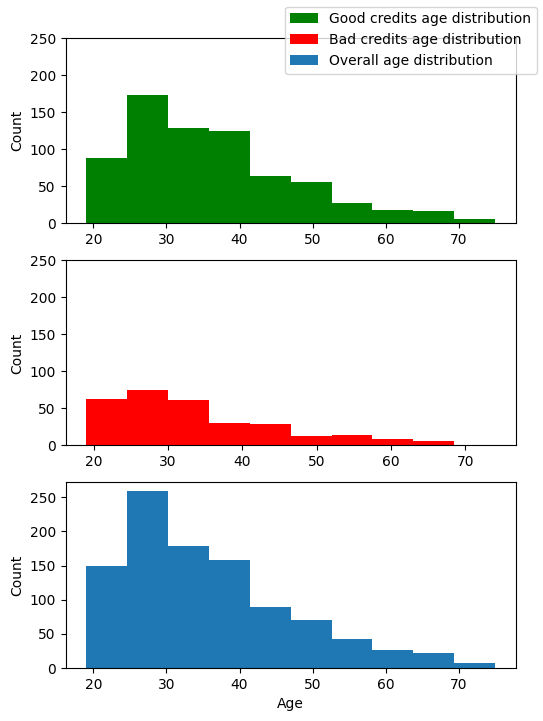

In [24]:
fig, ax = plt.subplots(3,1, figsize = (5,7), dpi = 100)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)

ax[0].hist(data[data["credit_risk"] == "good"].age, color = "g")
ax[0].set_ylim(top = 250)
ax[0].set_ylabel("Count")


ax[1].hist(data[data["credit_risk"] == "bad"].age, color = "r")
ax[1].set_ylim(top = 250)
ax[1].set_ylabel("Count")


ax[2].hist(data.age)
ax[2].set_ylabel("Count")
ax[2].set_xlabel("Age")


fig.legend([ax[0], ax[1], ax[2]], labels = ['Good credits age distribution',
                                            'Bad credits age distribution',
                                            'Overall age distribution'],
           loc = 'upper right');


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

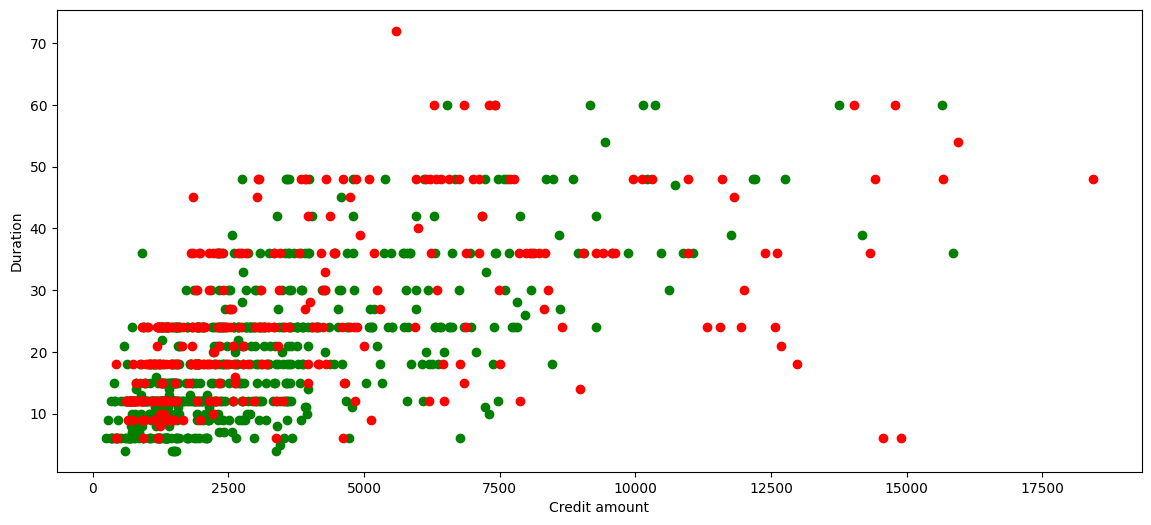

In [25]:
plt.figure(figsize = (14,6))
plt.scatter(data[data.credit_risk == "good"].amount,
            data[data.credit_risk == "good"].duration, c = "g");

plt.scatter(data[data.credit_risk == "bad"].amount,
            data[data.credit_risk == "bad"].duration, c = "r");
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

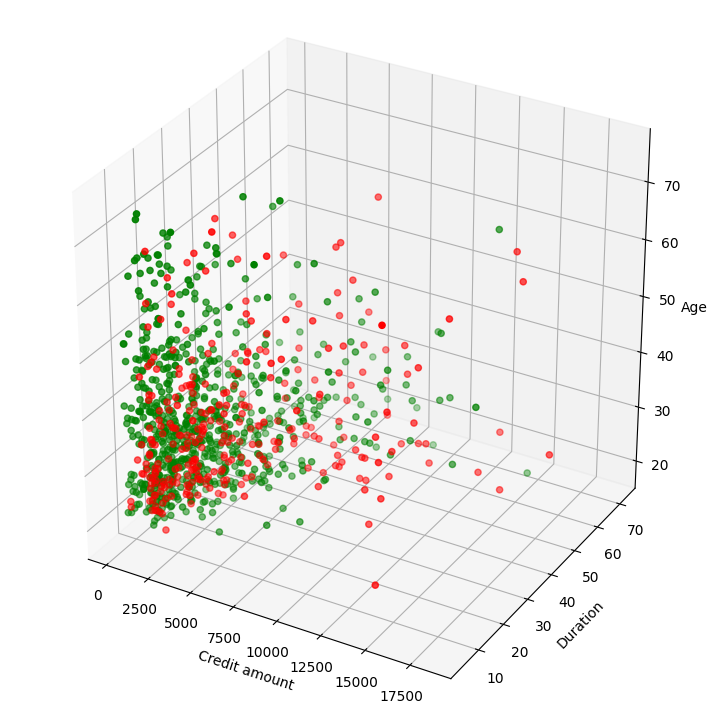

In [26]:
fig, ax  = plt.figure(figsize = (20,9), dpi = 100), plt.axes(projection = "3d")

ax.scatter3D(data[data.credit_risk == "good"].amount,
             data[data.credit_risk == "good"].duration,
             data[data.credit_risk == "good"].age,
             c = "g")

ax.scatter3D(data[data.credit_risk == "bad"].amount,
             data[data.credit_risk == "bad"].duration,
             data[data.credit_risk == "bad"].age,
             c = "r")

ax.set_xlabel("Credit amount");
ax.set_ylabel('Duration');
ax.set_zlabel('Age');
ax.set_box_aspect([1, 0.95, 1])

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [27]:
data.drop(columns = CategoricalData, inplace = True)

In [28]:
codes = {"status": [1,3,2,0],
         "savings":[1,4,2,3,0],
         "employment_duration":[2,3,1,4,0],
         'installment_rate': [1,2,0,3],
         "present_residence": [1,2,0,3],
         "number_credits":[3,2,1,0]}
for i in OrdinalData:
  categories = dict(zip(sorted(data[i].unique()), codes[i]))
  print(i + ":", categories)
  data[i] = data[i].apply(lambda x: categories[x])

status: {'... < 0 DM': 1, '... >= 200 DM / salary for at least 1 year': 3, '0<= ... < 200 DM': 2, 'no checking account': 0}
savings: {'... <  100 DM': 1, '... >= 1000 DM': 4, '100 <= ... <  500 DM': 2, '500 <= ... < 1000 DM': 3, 'unknown/no savings account': 0}
employment_duration: {'1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '< 1 yr': 1, '>= 7 yrs': 4, 'unemployed': 0}
installment_rate: {'20 <= ... < 25': 1, '25 <= ... < 35': 2, '< 20': 0, '>= 35': 3}
present_residence: {'1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '< 1 yr': 0, '>= 7 yrs': 3}
number_credits: {'1': 3, '2-3': 2, '4-5': 1, '>= 6': 0}


In [29]:
BinaryData
for i in BinaryData:
  categories = dict(zip(sorted(data[i].unique()), [0,1]))
  print(i + ":", categories)
  data[i] = data[i].apply(lambda x: categories[x])


people_liable: {'0 to 2': 0, '3 or more': 1}
telephone: {'no': 0, 'yes (under customer name)': 1}
foreign_worker: {'no': 0, 'yes': 1}
credit_risk: {'bad': 0, 'good': 1}


In [30]:
data.dtypes

status                 int64
duration               int64
amount                 int64
savings                int64
employment_duration    int64
installment_rate       int64
present_residence      int64
age                    int64
number_credits         int64
people_liable          int64
telephone              int64
foreign_worker         int64
credit_risk            int64
dtype: object

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [31]:
def round_to_zero_or_one(num):
    if abs(num - 0) < abs(num - 1):
        return 0
    else:
        return 1
def predict(Xtest: np.array) -> np.array:
  mean = np.mean(Xtest, axis = 0)
  std = np.std(Xtest, axis = 0)
  Xtest = np.divide((Xtest - mean), std, where = std!=0)
  return  np.vectorize(round_to_zero_or_one)((Xtest[:, 1]**2)*1.5 - 0.9*Xtest[:, 1]**3 - Xtest[:, 2]**3 + Xtest[:, 3]**3)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

<ipython-input-31-d2aa22a34777>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.6